In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
import os

In [2]:
# keeping the path to the dataset
directory = r'C:\Users\HP\Desktop\Python\videos\machine learning\DS Datasets\data_cat_dog'

# grouping the images
categories = ['cat', 'dog']

In [3]:
# setting image_size uniformly across board
img_size = 100

# creating empty list to store the preprocessed images
data = []

# looping through the images for preprocessing
for category in categories:
    folder = os.path.join(directory, category)
#     print(folder)
    label = categories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
#         print(img_path)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (img_size,img_size))
        data.append([img_arr, label])
#         plt.imshow(img_arr)
#         break

In [4]:
# checking total number of samples
len(data)

170

In [5]:
# shuffling the dataset
import random
random.shuffle(data)

In [6]:
# checking the composition of our data
data[0]

[array([[[ 25, 101, 149],
         [ 25, 101, 149],
         [ 27, 103, 151],
         ...,
         [ 20,  64, 111],
         [ 20,  65, 110],
         [ 21,  66, 110]],
 
        [[ 27, 101, 149],
         [ 27, 101, 149],
         [ 21,  96, 143],
         ...,
         [ 25,  69, 116],
         [ 26,  70, 116],
         [ 27,  72, 116]],
 
        [[ 24,  96, 144],
         [ 20,  92, 140],
         [ 27,  99, 147],
         ...,
         [ 28,  72, 119],
         [ 29,  73, 119],
         [ 30,  74, 118]],
 
        ...,
 
        [[ 51,  68,  81],
         [ 44,  62,  78],
         [ 40,  58,  76],
         ...,
         [  0,   0,  10],
         [  0,   1,   9],
         [  0,   2,   7]],
 
        [[ 40,  57,  70],
         [ 40,  58,  73],
         [ 43,  61,  78],
         ...,
         [  0,   1,  11],
         [  0,   2,  10],
         [  0,   3,   8]],
 
        [[ 46,  63,  76],
         [ 45,  62,  78],
         [ 41,  59,  76],
         ...,
         [  0,   1,  11],
  

In [7]:
# creating variables to store the features and labels
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [9]:
# confirming length of our samples
len(X), len(y)

(170, 170)

In [11]:
# converting the features and labels to numpy array fro easy of manipulation
X = np.array(X)
y = np.array(y)

In [10]:
# pickle.dump(X, open('X.pkl', 'wb'))
# pickle.dump(y, open('y.pkl', 'wb'))

In [37]:
# importing the modelling libraries
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [15]:
# splitting to bothe train and test samples

X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127, 100, 100, 3), (43, 100, 100, 3), (127,), (43,))

In [20]:
# modelling

model = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = 'accuracy')

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
4/4 [==============================] - 3s 159ms/step - loss: 5.4856 - accuracy: 0.4646
Epoch 2/5
4/4 [==============================] - 1s 157ms/step - loss: 0.9995 - accuracy: 0.5118
Epoch 3/5
4/4 [==============================] - 1s 156ms/step - loss: 0.8229 - accuracy: 0.5039
Epoch 4/5
4/4 [==============================] - 1s 156ms/step - loss: 0.5946 - accuracy: 0.6535
Epoch 5/5
4/4 [==============================] - 1s 170ms/step - loss: 0.5685 - accuracy: 0.6693


In [21]:
# scoring our model

model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 37ms/step - loss: 0.5686 - accuracy: 0.7209


[0.5685815811157227, 0.7209302186965942]

In [23]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 33ms/step


In [24]:
y_preds = []
for prediction in predictions:
    if prediction >= 0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [25]:
# result
np.array(y_preds[:10])

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [26]:
np.array(y_test[:10])

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0])

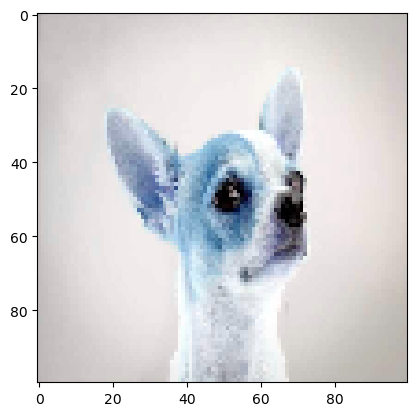

In [34]:
plt.imshow(X_test[5])

In [40]:
# plot confusion mstrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)

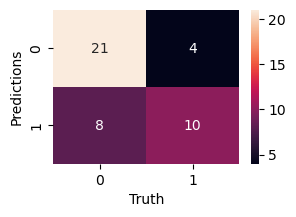

In [41]:
import seaborn as sns
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predictions')
plt.show()